In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time 
import h5py
import scipy.linalg as linalg
import ActivityPatterns as ap
import ThermalImagingAnalysis as tai
import scipy.io
import sklearn.metrics
from sklearn import mixture
import opengm
from scipy.linalg import norm
from numpy.linalg import lstsq

In [2]:
# Data and parametric component
pPenalty = "Penalty_Gaussian_1024fr_2.5Hz_TruncatedWaveletBasis.mat"
pioData = h5py.File("626510_sep.mat","r")
S = np.array(pioData["S1024"])
T = np.array(pioData["T1024"])
S2 = S[0:1024,]
T2 = T[0:1024,]
noTimepoints, noPixels = S2.shape
f_P = h5py.File(pPenalty, "r")
P = f_P["BPdir2"].value   # learned penalty matrix
print('[INFO] P is being transposed\n')
P = P.transpose() # P appears to be stored as transposed version of itself
B = f_P["B"].value # basis matrix

[INFO] P is being transposed



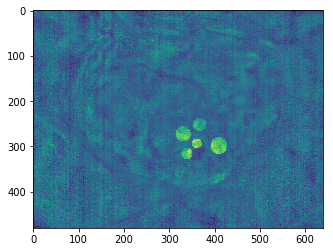

In [3]:
#compute gaussian activity pattern
X = ap.computeGaussianActivityPattern(np.squeeze(T2)).transpose();
lambda_pairwise = 1
num_clusters = 10
#semiparametric regression
Z = tai.semiparamRegression(S2, X, B, P, num_clusters,noPixels,lambda_pairwise)
plt.imshow(Z.reshape(640,480).transpose())
plt.show()

In [4]:
#accuracy after pixel_mrf model
groundtruthImg = np.array(pioData["groundtruthImg"].value)
groundtruth_foreground = np.where(groundtruthImg > 0)[0]
groundtruth_background = np.where(groundtruthImg == 0)[0]
true_positive =  len(np.where(abs(Z[groundtruth_foreground,]) >= 5.2)[0])                                  
false_positive = len(np.where(abs(Z[groundtruth_foreground,]) < 5.2)[0])
true_negative = len(np.where(abs(Z[groundtruth_background,]) < 5.2)[0])
false_negative = len(np.where(abs(Z[groundtruth_background,]) >= 5.2)[0])
true_positive_rate = true_positive / np.float32(len(groundtruth_foreground))
false_positive_rate = false_positive / np.float32(len(groundtruth_background))
accuracy  = (true_positive + true_negative) / np.float32(len(groundtruth_background) + len(groundtruth_foreground))

In [5]:
#F1 score metrics for better evaluation
Z_true = groundtruthImg.flatten()
for i in range(len(Z_true)):
    if Z_true[i] != 0:
       Z_true[i] = 1
    else:
       Z_true[i] = 0
    
Z_pred = np.zeros(len(Z_true))
for i in range(len(Z_pred)):
    if Z[i] >= 5.2:
       Z_pred[i] = 1
    else:
       Z_pred[i] = 0

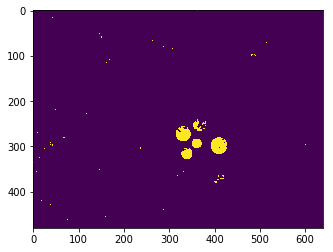

In [6]:
plt.imshow(Z_pred.reshape(640,480).transpose())

In [7]:
true_positive

2999

In [8]:
false_positive

494

In [9]:
true_negative

303431

In [10]:
false_negative

276

In [11]:
true_positive_rate

0.858574291440023

In [12]:
false_positive_rate

0.0016265677116431298

In [13]:
accuracy

0.9974934895833333

In [14]:
F1 = sklearn.metrics.f1_score(Z_true, Z_pred, average='binary')

In [15]:
F1

0.8878034339846064